In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [2]:
df = pd.read_csv('iris.csv')


In [3]:
df.shape


(150, 5)

In [4]:
df.head()
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df['species'] = le.fit_transform(df['species'])

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [8]:
data = df.values[:,:4]

In [9]:
clusters = 3   #setosa, virginca, ver..
n = 150
s = 4
p= 2


In [10]:
mean = np.mean(data, axis = 0)
mean

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [13]:
std = np.std(data, axis = 0)
std

array([0.82530129, 0.43214658, 1.75852918, 0.76061262])

In [14]:
weight = np.random.dirichlet(np.ones(clusters), size = len(data))             #assigning random weights
weight

array([[0.17313325, 0.36328852, 0.46357823],
       [0.42447038, 0.14277206, 0.43275756],
       [0.1211914 , 0.56916663, 0.30964197],
       [0.64388126, 0.09402449, 0.26209426],
       [0.52733783, 0.06531415, 0.40734802],
       [0.42551383, 0.22941128, 0.34507489],
       [0.16620678, 0.76426171, 0.06953151],
       [0.6885871 , 0.2399819 , 0.071431  ],
       [0.17153916, 0.09444825, 0.73401259],
       [0.17506754, 0.67945904, 0.14547342],
       [0.16256125, 0.24381814, 0.59362062],
       [0.48878243, 0.00661618, 0.50460139],
       [0.6801851 , 0.02458579, 0.29522911],
       [0.04812318, 0.47699348, 0.47488335],
       [0.15469659, 0.79085366, 0.05444975],
       [0.0558678 , 0.79168222, 0.15244998],
       [0.0161845 , 0.26183896, 0.72197654],
       [0.48934117, 0.41980242, 0.09085641],
       [0.09632537, 0.23132996, 0.67234467],
       [0.26514535, 0.15988226, 0.57497239],
       [0.25200737, 0.63099658, 0.11699605],
       [0.22842436, 0.26704171, 0.50453393],
       [0.

In [15]:
val = 100
error = np.zeros((n,clusters))

In [16]:
for z in range(70):

    wp = np.multiply(weight, weight)        #with p= 2, power of weight is raised to 2
    sumw = np.sum(wp, axis =0)              #calculating sum of squares of weights of same clusters
    
    centroid = np.transpose(np.divide((np.dot(np.transpose(data), wp)), sumw))       #calculating the centroid by transposing data matrix and multiplying
                                                                       #it with the wp matrix, transposing it again to get the accurate centroid amtrix
    distances = np.zeros((n,clusters))       #initalising the matrix clusters

    for i in range(clusters):                 #finding the eucledian disance between xj and cj
        distances[:,i] = np.linalg.norm(data - centroid[i], axis=1)
    
    distsum = np.zeros((n,clusters))

    wt = np.zeros((n,clusters))
    for i in range(len(distances)):
        distsum[i] = 1/distances[i]

    invsum = np.sum(distsum, axis = 1)    
    for i in range(len(distances)):
        for j in range(0, 3):
            wt[i][j] = (float(1/distances[i][j]))/(float(invsum[i]))

    error = np.absolute(wt - weight)
    weight = np.array(wt)
#val = np.sum(np.sum(error, axis = 1), axis = 0)


In [17]:
    #print(val)
m = np.sum(error, axis = 1)
print(float(np.sum(m)))

1.3836660730376371e-08


In [18]:
category = np.zeros(n)
for i in range(len(weight)):
    maxim = max(weight[i])

    if weight[i][0] == maxim:
        category[i] = 0

    elif weight[i][1] == maxim:
        category[i] = 1

    elif weight[i][2] == maxim:
        category[i] = 2

In [19]:
print(category)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 0. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2.
 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


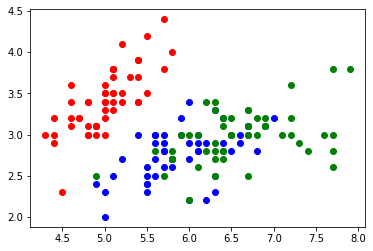

In [20]:
colors = ['red', 'blue', 'green']
species = [0, 1, 2]
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label = species[i])

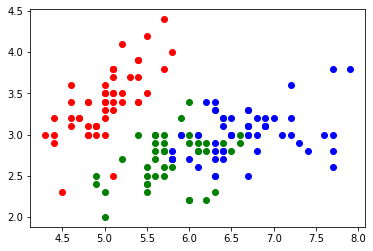

In [21]:
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], color = colors[int(category[i])], label = category[i])

In [23]:
category

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
       2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
df['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [25]:
sp =0
sp2 = 0
sp3= 0
for i in range(n):
    if category[i] == 0:
        sp += 1
    elif category[i] == 1:
        sp2 += 1
    elif category[i] == 2:
        sp3 += 1
print(sp, sp2, sp3)    

51 50 49
